In [1]:
%load_ext autoreload
%autoreload 2
from sklearn.model_selection import train_test_split
from neural_model.ranknet import construct_pair, RankNet
from tensorflow.keras.utils import plot_model, Progbar
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model, Progbar

[RankNet, LambdaRank TensorFlow Implementation— part I](https://medium.com/swlh/ranknet-factorised-ranknet-lambdarank-explained-implementation-via-tensorflow-2-0-part-i-1e71d8923132)

In [2]:
# visualize model architecture
plot_model(RankNet().build_graph(), show_shapes=False)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


2022-05-30 20:28:48.177119: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-30 20:28:48.177277: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-30 20:28:48.178245: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
# generate data
nb_query = 20
query = np.array([i+1 for i in range(nb_query) for x in range(int(np.ceil(np.abs(np.random.normal(0,scale=15))+2)))])
doc_features = np.random.random((len(query), 10))
doc_scores = np.random.randint(5, size=len(query)).astype(np.float32)
query.shape, doc_features.shape, doc_scores.shape

((345,), (345, 10), (345,))

In [ ]:
xi, xj, pij, pair_id, pair_query_id = construct_pair(query, doc_features, doc_scores)
print(xi.shape, xj.shape, pij.shape)

In [5]:
xi_train, xi_test, xj_train, xj_test, pij_train, pij_test, pair_id_train, pair_id_test = train_test_split(
    xi, xj, pij, pair_id, test_size=0.2, stratify=pair_query_id)

In [6]:
# train model using compile and fit
ranknet = RankNet()
ranknet.compile(optimizer='adam', loss='binary_crossentropy')
history = ranknet.fit([xi_train, xj_train], pij_train, epochs=5, batch_size=1, validation_data=([xi_test, xj_test], pij_test))

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-05-30 20:31:06.134197: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-30 20:31:06.154443: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699850000 Hz


2106/2106 [==============================] - 8s 3ms/step - loss: 0.6943 - val_loss: 0.6778
Epoch 2/5
2106/2106 [==============================] - 8s 4ms/step - loss: 0.6707 - val_loss: 0.6633
Epoch 3/5
2106/2106 [==============================] - 6s 3ms/step - loss: 0.6620 - val_loss: 0.6508
Epoch 4/5
2106/2106 [==============================] - 4s 2ms/step - loss: 0.6565 - val_loss: 0.6414
Epoch 5/5
2106/2106 [==============================] - 5s 2ms/step - loss: 0.6472 - val_loss: 0.6283


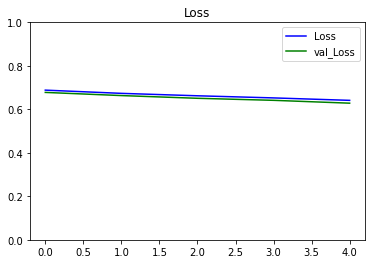

In [7]:
# function for plotting loss
def plot_metrics(train_metric, val_metric=None, metric_name=None, title=None, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(train_metric,color='blue',label=metric_name)
    if val_metric is not None: plt.plot(val_metric,color='green',label='val_' + metric_name)
    plt.legend(loc="upper right")

# plot loss history
plot_metrics(history.history['loss'], history.history['val_loss'], "Loss", "Loss", ylim=1.0)